In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [3]:
x_train = sequence.pad_sequences(x_train, maxlen = 250)
x_test = sequence.pad_sequences(x_test, maxlen = 250)

In [6]:
model = Sequential([Embedding(5000, 32), Flatten(), Dense(128, activation='relu'), Dense(1, activation='sigmoid')])

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=4, batch_size=64, verbose=1)

Epoch 1/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6958 - loss: 0.5383
Epoch 2/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9377 - loss: 0.1675
Epoch 3/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9898 - loss: 0.0401
Epoch 4/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9991 - loss: 0.0075


In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f%%' % (accuracy*100))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8381 - loss: 0.6350
Accuracy: 83.79%


In [10]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.92).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [11]:
positive_predictions = np.sum(y_pred)
negative_predictions = len(y_pred) - positive_predictions

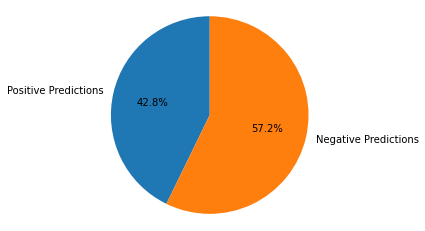

In [13]:
labels = 'Positive Predictions', 'Negative Predictions'
sizes = [positive_predictions, negative_predictions]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()